# We’ll use this to cluster customers based on purchasing behavior.

In [1]:
#import libaries
import pandas as pd 

In [2]:
# gather and load dataset
data_path = f"C:\\Users\\lenovo\\Documents\\SMILES_Lab_Stuff\\Training_Project\clustering\\Mall_Customers.csv"

In [3]:
#loading dataset 
pd_data = pd.read_csv(data_path)

In [4]:
pd_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing



In [5]:
# Select the feature that will be use for clustering
X = pd_data[['Age','Annual Income (k$)' ,'Spending Score (1-100)']]

In [6]:
print(X.shape)

(200, 3)


In [7]:
# normalixe 
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_scaler = scaler.fit_transform(X)

# Finding the optimal number of cluster

In [8]:
# Find the number of clusters using Elbow method(k)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [9]:
inertial = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(X)
    inertial.append(kmeans.inertia_)
    
    
    
   


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

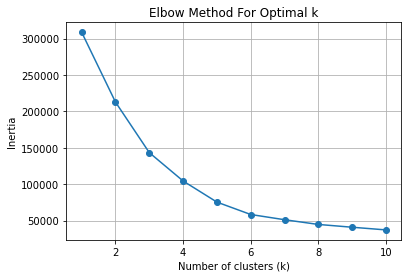

In [10]:
plt.plot (range(1,11),inertial,marker = 'o')
plt.title("Elbow Method For Optimal k")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Apply K Means Clustering

In [11]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaler)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Visualize the Clusters

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaler)


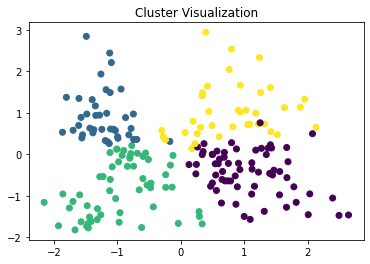

In [17]:
plt.scatter(X_pca[:,0],X_pca[:,1], c= clusters ,cmap="viridis")
plt.title("Cluster Visualization")
plt.show()